In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = '../data/adult.csv'

In [3]:
df = pd.read_csv(data)

The dataset made available through Kaggle.com is a sample of the 1994 Census data. Here I explore the impact education and race has on ability to make over 50K dollars which is equivalent to roughly 88K dollars today. 

I believe the ability to make over 50K is hindered based on race. In other words, if you are a race other than white, you are less likely to represent the making over 50K dallars group in the dataset.

## Data exploration

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
ints = df.select_dtypes('int')

In [8]:
[df[col].describe() for col in ints]

[count    32561.000000
 mean        38.581647
 std         13.640433
 min         17.000000
 25%         28.000000
 50%         37.000000
 75%         48.000000
 max         90.000000
 Name: age, dtype: float64,
 count    3.256100e+04
 mean     1.897784e+05
 std      1.055500e+05
 min      1.228500e+04
 25%      1.178270e+05
 50%      1.783560e+05
 75%      2.370510e+05
 max      1.484705e+06
 Name: fnlwgt, dtype: float64,
 count    32561.000000
 mean        10.080679
 std          2.572720
 min          1.000000
 25%          9.000000
 50%         10.000000
 75%         12.000000
 max         16.000000
 Name: education.num, dtype: float64,
 count    32561.000000
 mean      1077.648844
 std       7385.292085
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max      99999.000000
 Name: capital.gain, dtype: float64,
 count    32561.000000
 mean        87.303830
 std        402.960219
 min          0.000000
 25%          0.000000
 50%          0

In [9]:
objects = df.select_dtypes('object')

In [10]:
[df[col].value_counts() for col in objects]

[Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
 Name: workclass, dtype: int64,
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
 Name: education, dtype: int64,
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
 Name: marital.status, dtype: int64,
 Prof-specialty       4140
 Craft-repair         4099
 Exec-mana

### EDA

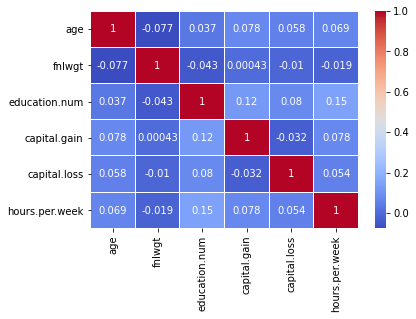

In [11]:
plt.figure()
sns.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)
plt.yticks(rotation=0);

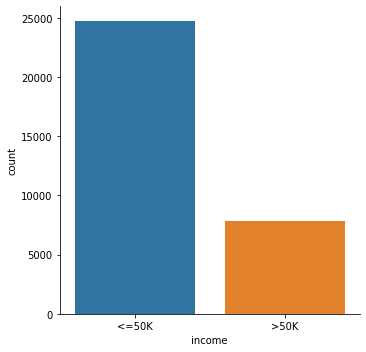

In [12]:
sns.catplot(x='income', data=df, kind='count')
plt.show()

In [13]:
df.income.value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [14]:
print('Of the 32561 samples, {} percent make over 50K dollars'.format(round(df.income.value_counts(normalize=True)[1], 2) * 100))

Of the 32561 samples, 24.0 percent make over 50K dollars


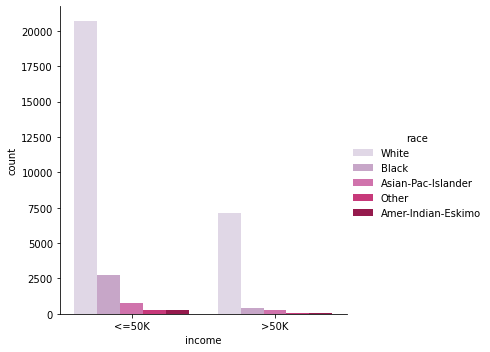

In [15]:
sns.catplot(x='income', data=df, kind='count', hue='race', palette='PuRd')
plt.show()

In [16]:
round(df['race'][df['income'] == '<=50K'].value_counts(normalize=True)*100, 2)

White                 83.73
Black                 11.07
Asian-Pac-Islander     3.09
Amer-Indian-Eskimo     1.11
Other                  1.00
Name: race, dtype: float64

In [17]:
round(df['race'][df['income'] == '>50K'].value_counts(normalize=True)*100, 2)

White                 90.77
Black                  4.94
Asian-Pac-Islander     3.52
Amer-Indian-Eskimo     0.46
Other                  0.32
Name: race, dtype: float64

### accounting for sample weight

In [18]:
pct = []
cols = []

for item in df['race'].unique():
    pct.append(len(df[(df['income']=='>50K') & (df['race']==item)]) / len(df[df['race']==item]) * 100)
    cols.append(item)
    
df_pct_over50K = pd.DataFrame({'pct_making_over_50K':pct,'race':cols})

In [19]:
df_pct_over50K = df_pct_over50K.set_index('race')
df_pct_over50K

,pct_making_over_50K
race,
White,25.585994
Black,12.387964
Asian-Pac-Islander,26.564004
Other,9.225092
Amer-Indian-Eskimo,11.575563


In [20]:
col_order = ['Preschool','1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th','HS-grad',
             'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']

In [21]:
def plot_race(race):
    
    sns.catplot(x='education', data=df[df['race']==race], kind='count', order=col_order, palette='Blues')
    plt.xticks(rotation=90)
    plt.show()

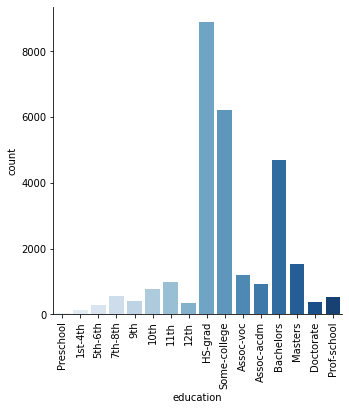

In [22]:
plot_race('White')

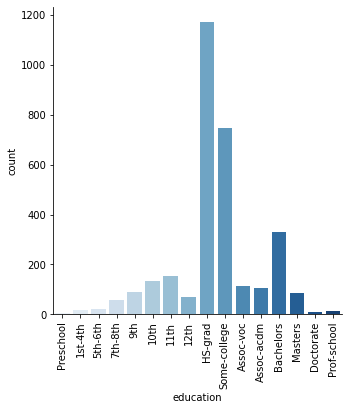

In [23]:
plot_race('Black')

In [24]:
four_yr_educ = ['Bachelors', 'Masters', 'Doctorate', 'Prof-school']

In [25]:
pct = []
cols = []

for item in df['race'].unique():
    pct.append(len(df[(df['education'].isin(four_yr_educ)) & (df['race']==item)]) / len(df[df['race']==item]) * 100)
    cols.append(item)
    
df_pct_four_yr_educ = pd.DataFrame({'pct_4+yr_educ':pct,'race':cols})
df_pct_four_yr_educ

,pct_4+yr_educ,race
0,25.532068,White
1,14.148528,Black
2,42.925890,Asian-Pac-Islander
3,16.974170,Other
4,9.967846,Amer-Indian-Eskimo


In [26]:
df_pct_four_yr_educ = df_pct_four_yr_educ.set_index('race')
df_pct_four_yr_educ

,pct_4+yr_educ
race,
White,25.532068
Black,14.148528
Asian-Pac-Islander,42.925890
Other,16.974170
Amer-Indian-Eskimo,9.967846


In [27]:
race_df = pd.merge(df_pct_four_yr_educ, df_pct_over50K, on='race')
race_df

,pct_4+yr_educ,pct_making_over_50K
race,,
White,25.532068,25.585994
Black,14.148528,12.387964
Asian-Pac-Islander,42.925890,26.564004
Other,16.974170,9.225092
Amer-Indian-Eskimo,9.967846,11.575563


### 4+ years educated

In [28]:
df_over_fiftyK = df[df['income'] == '>50K']

In [29]:
round(df_over_fiftyK.groupby('occupation')['income'].count() / df.groupby('occupation')['income'].count() * 100, 2).sort_values(ascending=False)

occupation
Exec-managerial      48.40
Prof-specialty       44.90
Protective-serv      32.51
Tech-support         30.50
Sales                26.93
Craft-repair         22.66
Transport-moving     20.04
Adm-clerical         13.45
Machine-op-inspct    12.49
Farming-fishing      11.57
Armed-Forces         11.11
?                    10.36
Handlers-cleaners     6.28
Other-service         4.16
Priv-house-serv       0.67
Name: income, dtype: float64

In [30]:
df_educ = df[df['education'].isin(four_yr_educ)]
df_educ.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
13,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K


In [31]:
df_educ.groupby('race').mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
race,,,,,,
Amer-Indian-Eskimo,41.225806,130022.193548,13.580645,1880.322581,114.225806,43.645161
Asian-Pac-Islander,38.739910,167674.403587,13.569507,2685.248879,132.791480,41.762332
Black,39.049774,232310.337104,13.337104,1496.006787,108.151584,41.350679
Other,37.000000,166702.369565,13.456522,4840.695652,68.891304,42.543478
White,41.142073,184710.078569,13.517037,2766.718812,147.706843,43.682343


In [32]:
def specialty(race):
    print(round(df_educ[df_educ['race'] == race]['occupation'].value_counts(normalize=True) * 100, 2))

In [33]:
specialty('White')

Prof-specialty       38.90
Exec-managerial      25.04
Sales                12.52
Adm-clerical          6.79
Tech-support          3.28
Craft-repair          3.20
?                     3.03
Other-service         2.21
Farming-fishing       1.27
Protective-serv       1.24
Transport-moving      0.90
Machine-op-inspct     0.84
Handlers-cleaners     0.65
Priv-house-serv       0.11
Armed-Forces          0.03
Name: occupation, dtype: float64


In [34]:
specialty('Black')

Prof-specialty       35.07
Exec-managerial      22.62
Adm-clerical         10.86
Sales                 8.82
Protective-serv       5.66
Other-service         3.39
Tech-support          3.39
?                     2.71
Craft-repair          2.49
Transport-moving      1.81
Machine-op-inspct     1.58
Handlers-cleaners     1.58
Name: occupation, dtype: float64


In [35]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [36]:
df.groupby('race').mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
race,,,,,,
Amer-Indian-Eskimo,37.173633,120831.147910,9.311897,625.266881,34.176849,40.048232
Asian-Pac-Islander,37.746872,159940.609240,10.960539,1478.358037,97.222329,40.127045
Black,37.767926,228013.124200,9.486236,609.940461,60.385083,38.422855
Other,33.457565,197124.191882,8.841328,934.660517,61.070111,39.468635
White,38.769881,187298.064280,10.135246,1121.660375,90.806155,40.689100


In [37]:
df_educ['income'].value_counts(normalize=True)

<=50K    0.515433
>50K     0.484567
Name: income, dtype: float64

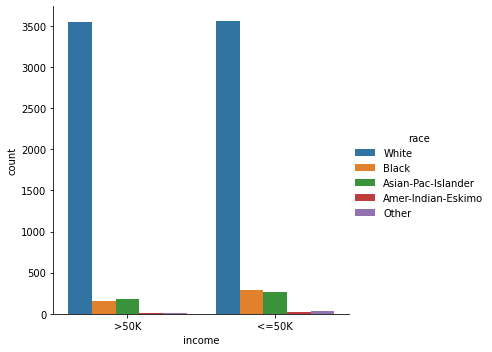

In [38]:
sns.catplot(x='income', data=df_educ, kind='count', hue='race')
plt.show()

In [39]:
more_than_50K = []

for item in df_educ['race'].unique():
    table = df_educ['income'][df_educ['race'] == item].value_counts(normalize=True)
    more_than_50K.append(table[1])

In [40]:
final_df = pd.DataFrame({'race': df_educ['race'].unique(), 'pct_over_50K':more_than_50K})

In [41]:
final_df = final_df.sort_values('pct_over_50K')

In [42]:
final_df

,race,pct_over_50K
4,Other,0.260870
1,Black,0.346154
2,Asian-Pac-Islander,0.414798
3,Amer-Indian-Eskimo,0.483871
0,White,0.499014


In [43]:
less_than_four_year = ['Preschool','1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th','HS-grad',
             'Some-college', 'Assoc-voc', 'Assoc-acdm']

In [44]:
df_no_educ = df[df['education'].isin(less_than_four_year)]

In [45]:
more_than_50K_no_ed = []

for item in df_no_educ['race'].unique():
    table = df_no_educ['income'][df_no_educ['race'] == item].value_counts(normalize=True)
    more_than_50K_no_ed.append(table[1])

In [46]:
final_no_ed_df = pd.DataFrame({'race': df_no_educ['race'].unique(), 'pct_over_50K':more_than_50K_no_ed})

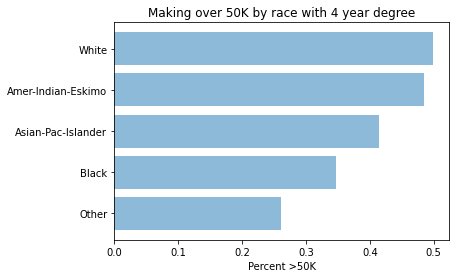

In [47]:
plt.barh(final_df['race'], final_df['pct_over_50K'], alpha=0.5)
plt.title('Making over 50K by race with 4 year degree')
plt.xlabel('Percent >50K')
plt.show()

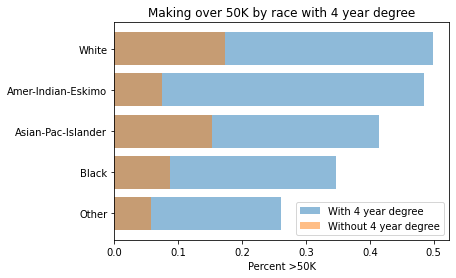

In [48]:
plt.barh(final_df['race'], final_df['pct_over_50K'], alpha=0.5)
plt.barh(final_no_ed_df['race'], final_no_ed_df['pct_over_50K'], alpha=0.5)
plt.title('Making over 50K by race with 4 year degree')
plt.xlabel('Percent >50K')
plt.legend(['With 4 year degree', 'Without 4 year degree'])
plt.show()

In conclusion, there was an increased liklihood of making over 50K dollars a year if you acquire a bachelors degree. There is almost certainly disparity in the ability to achieve this based on race. Also, individuals who were not white were less likely to make over 50K dollars.  